<a href="https://colab.research.google.com/github/pedr19faria/pend-duplo/blob/main/DoublePendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib import animation
from matplotlib.animation import PillowWriter
import scipy.integrate as si

### Pêndulo Duplo 
Temos 4 equações diferenciais ordinárias a serem resolvidas. Usaremos o método de RK de 4 ordem para resolvê-las:

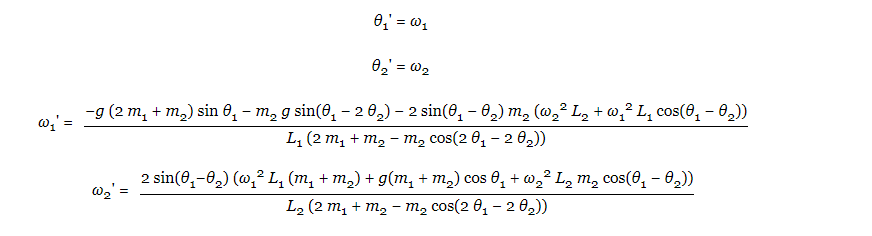

Como temos 4 EDOs temos que usar uma versão vetorizada da rotina RK4 (vista na aula EDO1), permitindo a evolução de quantas váriaveis desejamos de maneira simultanêa.

In [ ]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

Vou fazer primeiro usando o odeint.integrate

In [ ]:
### Iremos criar um vetor u que vai conter ângulo 1, velocidade 1, ângulo 2, velocidade 2;
### A função abaixo será a das derivadas, sendo que uprime[0] = derivada do ângulo 1 e assim por diante

In [ ]:
# u[0] = theta1
# u[1] = vel1
# u[2] = theta2
# u[3] = vel2
def pendulo_duplo(u,t,m1,m2,l1,l2,g):
  uprime = np.zeros_like(u)
  uprime[0] = u[1]

  uprime[1]= (-g*(2*m1 + m2)*np.sin(u[0]) - m2*g*np.sin(u[0] - 2*u[2]) - 2*np.sin(u[0] - u[2])*m2*((u[3]**2)*l2 + (u[1]**2)*l1*np.cos(u[0] - u[2])))/(l1*(2*m1+m2 - m2*np.cos(2*u[0] - 2*u[2])))

  uprime[2] = u[3]

  uprime[3] = (2*np.sin(u[0] - u[2])*((u[1]**2)*l1*(m1 + m2) + g*(m1 + m2)*np.cos(u[0]) + (u[3]**2)*l2*m2*np.cos(u[0] - u[2])))/(l2*(2*m1 + m2 - m2*np.cos(2*u[0] - 2*u[2])))

  return uprime ## Vetor com as 4 derivadas que precisamos resolver, que no caso são (theta1)', (w1)', (theta2)', (w2)'

In [ ]:
# Agora que temos as funções com as derivadas, iremos dar os valores necessários para resolver
n_passos = 1000
t = np.linspace(0.,100., n_passos)
m = 4 ### Quantidade de equações diferenciais
u = np.zeros((m))
l1 = 1.
l2 = 1.5
m1 = 3.
m2 = 3.
theta1 = np.radians(120)
w1 = 0.
theta2 = np.radians(120)
w2 = 0.
u[0] = theta1
u[1] = w1
u[2] = theta2
u[3] = w2
g = 9.8
resposta = si.odeint(pendulo_duplo, y0 = [theta1, w1, theta2, w2], t=t, args = (m1,m2,l1,l2,g))


In [ ]:
### Agora vamos pegar os valores para poder plotar o gráfico;
### O formato dado pelo odeint é [theta1, w1,theta2, w2] então ao pegar a transposta vamos ter esses todos valores de theta1 numa coluna, etc.
theta1 = resposta.T[0]
w1 = resposta.T[1]
theta2 = resposta.T[2]
w2 = resposta.T[3]

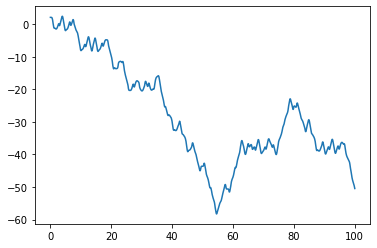

In [ ]:
### Plotar um gráfico:
plt.plot(t,theta2)

In [ ]:
### Só com esse exemplo percebe-se que fica bem estranho, então vamos plotar a animação:
def pos(l1,l2,theta1,theta2):
  x1 = -l1*np.sin(theta1)
  y1 = -l1*np.cos(theta1)
  x2 = -l2*np.sin(theta2) + x1 
  y2 = -l2*np.cos(theta2)  + y1
  return x1,y1,x2,y2
x1,y1,x2,y2 = pos(l1,l2,theta1,theta2)

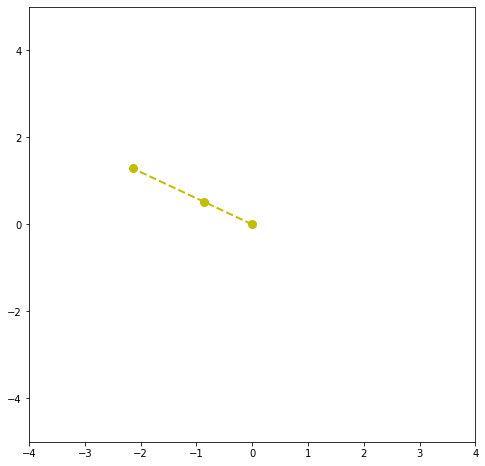

In [ ]:
def animate(i):
  ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])


fig, ax = plt.subplots(figsize = (8,8))
#ax.get_xaxis().set_ticks([])
#ax.get_yaxis().set_ticks([])
ax.set_xlim(-4,4)
ax.set_ylim(-5,5)
ln1, = plt.plot([],[], 'yo--',lw=2, markersize = 8 ) ## Aqui o plot é feito com os valores pegados na função animate
ani = animation.FuncAnimation(fig, animate, frames = 100, interval  = 50) 
### A função .FuncAnimation vai iterando essa função dada e cria a figura com isso, os frames são decididos a partir dos pontos que pegamos 
### na função pêndulo().
ani.save('pendulo_duplo.gif', writer = 'pillow', fps = len(t[t<1]))
### Aqui salva a animação em um gif que está anexado no envio da atividade

In [ ]:
def resposta(f, n, t, theta1,theta2,  l1=1.,l2 = 1.5, m1 = 3., m2 = 3.,):
  u = np.zeros((4))
  w1 = 0.
  w2 = 0.
  g=9.8
  u[0] = theta1
  u[1] = w1
  u[2] = theta2
  u[3] = w2
  resposta = si.odeint(f, y0 = [theta1, w1, theta2, w2], t=t, args = (m1,m2,l1,l2,g))
  return resposta, resposta.T[0], resposta.T[1], resposta.T[2], resposta.T[3]
def graph(resposta, t):
  theta1 = resposta.T[0]
  w1 = resposta.T[1]
  theta2 = resposta.T[2]
  w2 = resposta.T[3]  
  fig, ax = plt.subplots(1,2, figsize = (16,4))
  ax[0].plot(t,theta1)
  ax[0].set_xlabel('Tempo (s)')
  ax[0].set_ylabel('Theta 1 (radianos)')
  ax[0].set_title(f'Inicial: {theta1[0]:.5f} graus')

  ax[1].plot(t,theta2)
  ax[1].set_xlabel('Tempo (s)')
  ax[1].set_ylabel('Theta 2 (radianos)')
  ax[1].set_title(f'Inicial: {theta2[0]:.5f} radianos')
 
  fig, ax = plt.subplots(1,2, figsize = (16,4))
  ax[0].plot(t,w1)
  ax[0].set_xlabel('Tempo (s)')
  ax[0].set_ylabel('Velocidade 1 (radianos/segundos)')

  ax[1].plot(t,w2)
  ax[1].set_xlabel('Tempo (s)')
  ax[1].set_ylabel('Velocidade 2 (radianos/segundos)')


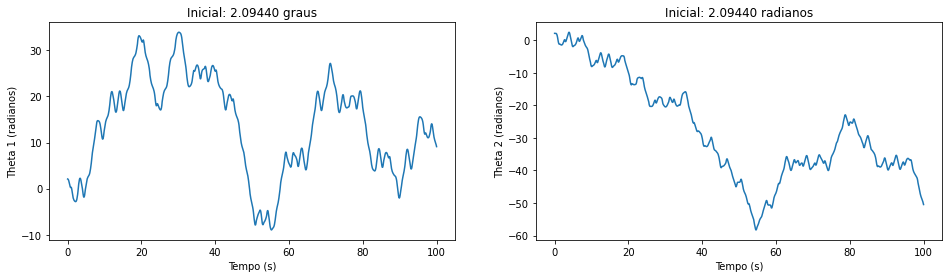

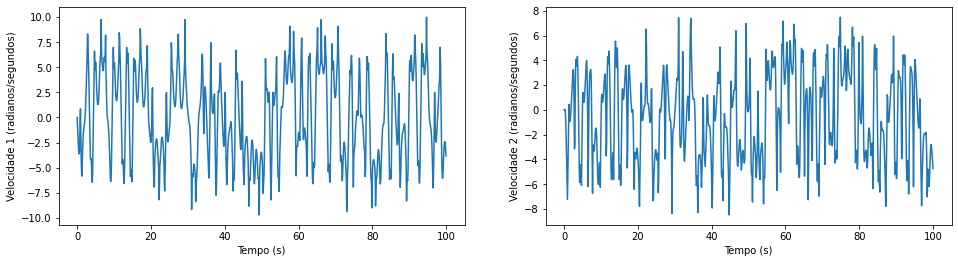

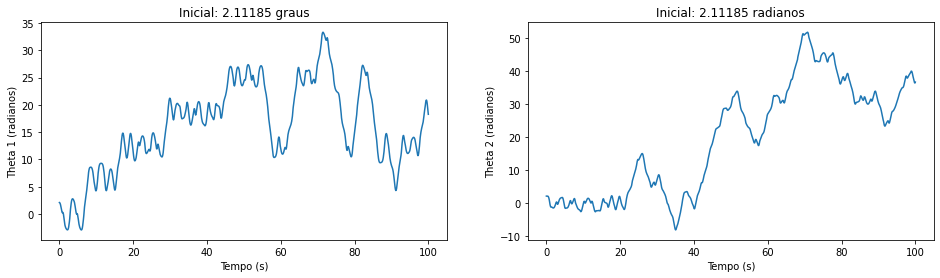

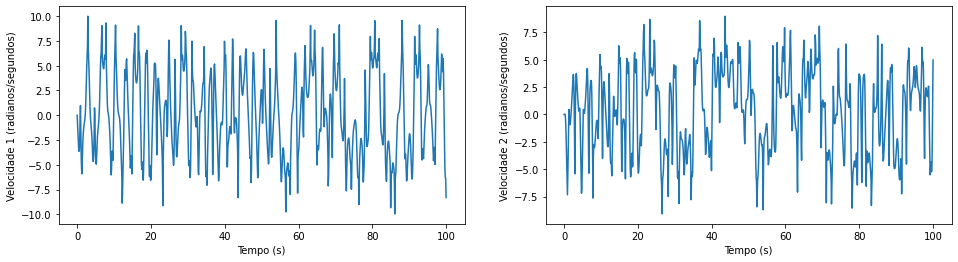

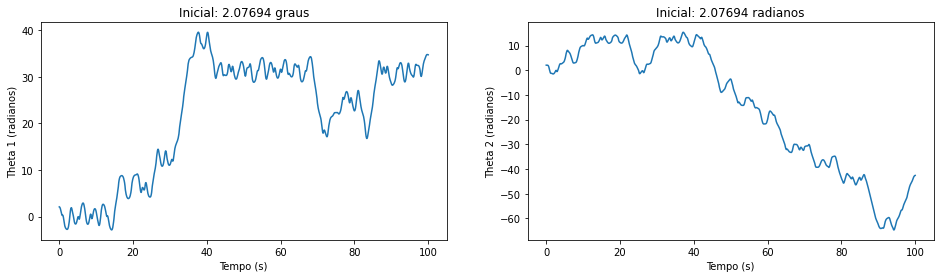

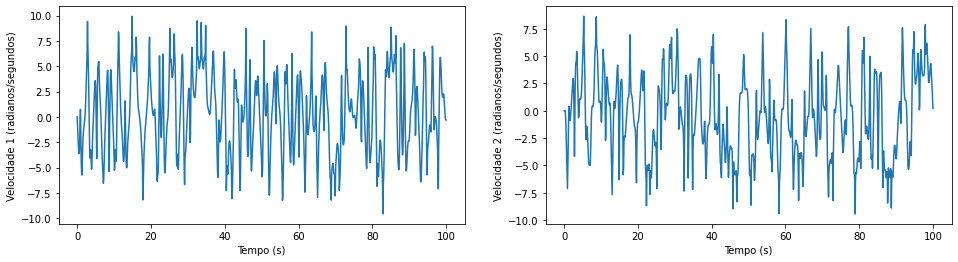

In [ ]:
theta1 = np.radians(120)
theta2 = np.radians(120)
theta11 = np.radians(121)
theta22 = np.radians(121)
theta3 = np.radians(119)
theta4 = np.radians(119)
res, ta1,wa1,ta2,wa2 = resposta(pendulo_duplo, n_passos, t, theta1,theta2)
res1, ta11,wa11,ta22,wa22 = resposta(pendulo_duplo, n_passos, t, theta11,theta22)
res2, ta3,wa3,ta4,wa4 = resposta(pendulo_duplo, n_passos, t, theta3,theta4)
graph(res, t)
graph(res1,t)
graph(res2,t)

In [ ]:
def pos(l1,l2,theta1,theta2):
  x1 = -l1*np.sin(theta1)
  y1 = -l1*np.cos(theta1)
  x2 = -l2*np.sin(theta2) + x1 
  y2 = -l2*np.cos(theta2)  + y1
  return x1,y1,x2,y2
x1,y1,x2,y2 = pos(l1,l2,ta1,ta2)
x11,y11,x22,y22 = pos(l1,l2,ta11,ta22)
x3,y3,x4,y4 = pos(l1,l2,ta3,ta4)

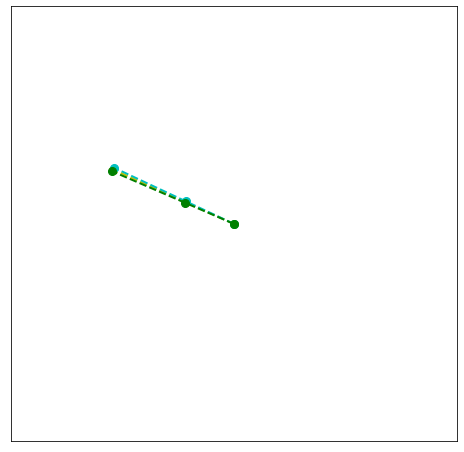

In [ ]:
def animate(i):
  ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
  ln2.set_data([0, x11[i], x22[i]], [0, y11[i], y22[i]])
  ln3.set_data([0, x3[i], x4[i]], [0, y3[i], y4[i]])

fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.set_xlim(-4,4)
ax.set_ylim(-5,5)
ln1, = plt.plot([],[], 'yo--',lw=2, markersize = 8 ) ## Aqui o plot é feito com os valores pegados na função animate
ln2, = plt.plot([],[], 'co--',lw=2, markersize = 8 )
ln3, = plt.plot([],[], 'go--',lw=2, markersize = 8 )
ani = animation.FuncAnimation(fig, animate, frames = 1000, interval  = 50) 
### A função .FuncAnimation vai iterando essa função dada e cria a figura com isso, os frames são decididos a partir dos pontos que pegamos 
### na função pêndulo().
ani.save('pendulo_duplo_3.gif', writer = 'pillow', fps = len(t[t<1]))
### Aqui salva a animação em um gif que está anexado no envio da atividade